In [11]:
from bs4 import BeautifulSoup
import requests, json

In [53]:
from IPython.core.display import display, HTML

In [9]:
html = requests.get("http://finance.vietstock.vn/HPG-ctcp-tap-doan-hoa-phat.htm").text
soup = BeautifulSoup(html, 'html5lib')

In [8]:
import scrapy

In [ ]:
baseUrl = "http://ivt.ssi.com.vn/CorporateSnapshot.aspx?Ticket=%s"
lsVN30 = ["CII", "CTD", "CTG", "DHG", "DPM", "EIB", "FPT", "GAS", "GMD", "HDB", 
           "HPG", "MBB", "MSN", "MWG", "NVL", "PNJ", "REE", "ROS", "SAB", "SBT",
           "SSI", "STB", "TCB", "VCB", "VHM", "VIC", "VJC", "VNM", "VPB", "VRE"]
lsHose = []
lsHnx = []

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html itemscope="itemscope" itemtype="http://schema.org/WebPage" xmlns="http://www.w3.org/1999/xhtml"><head id="MasterHead"><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><link href="//vietstock.vn/favicon.ico" rel="SHORTCUT ICON"/><link href="http://vietstock.vn/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="//vietstock.vn/css/style_blue.css" rel="stylesheet" type="text/css"/><link href="/RSS/Trang-chu.aspx" rel="alternate" title="VietstockFinance - RSS" type="application/rss+xml"/>
	
<script>
//check mobile device by javascript
(function (a, b) { if (/(android|bb\d+|meego).+mobile|avantgo|bada\/|blackberry|blazer|compal|elaine|fennec|hiptop|iemobile|ip(hone|od)|iris|kindle|lge |maemo|midp|mmp|mobile.+firefox|netfront|opera m(ob|in)i|palm( os)?|phone|p(ixi|re)\/|plucker|pocket|psp|series(4|6)0|symbian|treo|up\.(browser|link)|
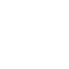

In [10]:
soup

In [ ]:
lsTag = ["PriceNow", "PriceNow_Percent", "PriceNow_Time", 
         "high", "low", "vol", "capitallevel", "buyred", "sellred",
         "yearhigh", "yearlow", "avgvol",
         "foreignbuyvol", "foreign", "dividend", "yield", "beta", 
         "eps", "pe", "fpe", "bvps", "pb"
        ] 

In [37]:
pPriceNow = soup("p", "PriceNow")
pPriceNowPct = soup("p", "PriceNow_Percent")
pPriceNowTime = soup("p", "PriceNow_Time")
tdHighest = soup.find("b", id="high")
tdLowest = soup.find("b", id="low")
tdVolumne = soup.find("b", id="vol")
tdCapLvl = soup.find("b", id="capitallevel")
tdBuy = soup.find("b", id="buyred")
tdSell = soup.find("b", id="sellred")

tdYearHigh = soup.find("b", id="yearhigh")
tdYearLow = soup.find("b", id="yearlow")
tdYearAvgVol = soup.find("b", id="avgvol")

tdFrgBuy = soup.find("b", id="foreignbuyvol")
tdFrgHold = soup.find("b", id="foreign")
tdDividend = soup.find("b", id="dividend")
tdYield = soup.find("b", id="yield")
tdBeta = soup.find("b", id="beta")

tdEps = soup.find("b", id="eps")
tdPe = soup.find("b", id="pe")
tdFpe = soup.find("b", id="fpe")
tdBvps = soup.find("b", id="bvps")
tdPb = soup.find("b", id="pb")

tblCompGen = soup.find("table", id="MainContent_Company_General_StockEOD_Lite1_gvEODList")


In [47]:
tds = tblCompGen.find_all("td", class_=False, id=False)

In [78]:
tblPriceHis = tblCompGen.find_all("tr", {"bgcolor": "White"})
tblPriceHisStr = [str(c) for c in tblPriceHis]

In [73]:
display(HTML(tblCompGen.prettify()))

Ngày,Giá,Thay đổi,Khối lượng,BQ mua,BQ bán,NN mua,NN bán
14/02/2019,"31,000",+100 ▲ (0.32%),"6,455,840","4,237.44","3,832.44","2,387,710","1,102,490"
13/02/2019,"30,900","+1,400 ▲ (4.75%)","11,079,510","5,075.23","5,179.44","5,204,660","837,050"
12/02/2019,"29,500",+600 ▲ (2.08%),"7,952,400","4,370.58","4,121.39","2,579,750","877,480"
11/02/2019,"28,900","+1,600 ▲ (5.86%)","2,836,470","2,175.12","2,064.72","1,141,480","386,710"
01/02/2019,"27,300",-400 ▼ (-1.44%),"7,100,180","4,152.61","4,990.8","1,328,370","3,560,330"


"""
Template
dictPriceHis = {"14/02/2019": {"price": , "changeVal": , "changePct": , "Volume": , 
                               "AvgBuy": , "AvgSell": , "frgBuy": , "frgSell": }
               }
"""


In [89]:
dictPriceHis = {}
lsColName = ["price", "changeVal", "changePct", "volume", "avgBuy", "avgSell", "frgBuy", "frgSell"]

In [90]:
for tr in tblPriceHis[:1]:
    tds = tr.find_all("td")
    for i, td in enumerate(tds):
        # print(type(td), td.get_text().strip())
        tmpText = td.get_text().strip()
        colIdx = 0
        if i == 0:
            day = tmpText
            dictPriceHis[day] = dict()
            print(day)
        elif i == 2:
            change = tmpText.split("▲")
            val = change[0]
            pct = change[1].replace("(","").replace(")","")
            print(val, pct)
            dictPriceHis[day][lsColName[colIdx]] = float(tmpText)
            colIdx = colIdx + 1
            dictPriceHis[day][lsColName[colIdx]] = float(tmpText)
            colIdx = colIdx + 1
        else:
            print(tmpText)
            dictPriceHis[day][lsColName[colIdx]] = float(tmpText)
            colIdx = colIdx + 1
            
            
            

14/02/2019
31,000


ValueError: could not convert string to float: '31,000'

In [70]:
display(HTML("".join(tblPriceHis)))

14/02/2019,"31,000",+100 ▲(0.32%),"6,455,840","4,237.44","3,832.44","2,387,710","1,102,490"
13/02/2019,"30,900","+1,400 ▲(4.75%)","11,079,510","5,075.23","5,179.44","5,204,660","837,050"
12/02/2019,"29,500",+600 ▲(2.08%),"7,952,400","4,370.58","4,121.39","2,579,750","877,480"
11/02/2019,"28,900","+1,600 ▲(5.86%)","2,836,470","2,175.12","2,064.72","1,141,480","386,710"
01/02/2019,"27,300",-400 ▼(-1.44%),"7,100,180","4,152.61","4,990.8","1,328,370","3,560,330"


In [51]:
print(tblCompGen.prettify())

<table cellpadding="5" cellspacing="1" class="FFree_Grid" id="MainContent_Company_General_StockEOD_Lite1_gvEODList" width="100%">
 <tbody>
  <tr class="FFree_Grid_Title">
   <td align="left" width="10%">
    Ngày
   </td>
   <td align="center" width="11%">
    Giá
   </td>
   <td align="center">
    Thay đổi
   </td>
   <td align="right" width="14%">
    Khối lượng
   </td>
   <td align="right" width="11%">
    BQ mua
   </td>
   <td align="right" width="11%">
    BQ bán
   </td>
   <td align="right" width="11%">
    NN mua
   </td>
   <td align="right" width="11%">
    NN bán
   </td>
  </tr>
  <tr align="right" bgcolor="White">
   <td align="left">
    14/02/2019
   </td>
   <td align="right">
    <font color="#008000">
     31,000
    </font>
   </td>
   <td align="right">
    <font color="#008000">
     +100
     <span>
      ▲
     </span>
     (0.32%)
    </font>
   </td>
   <td align="right">
    6,455,840
   </td>
   <td align="right">
    4,237.44
   </td>
   <td align="right"

In [43]:
tblCompGen

<table cellpadding="5" cellspacing="1" class="FFree_Grid" id="MainContent_Company_General_StockEOD_Lite1_gvEODList" width="100%">
		<tbody><tr class="FFree_Grid_Title">
			<td align="left" width="10%">Ngày</td><td align="center" width="11%">Giá</td><td align="center">Thay đổi</td><td align="right" width="14%">Khối lượng</td><td align="right" width="11%">BQ mua</td><td align="right" width="11%">BQ bán</td><td align="right" width="11%">NN mua</td><td align="right" width="11%">NN bán</td>
		</tr><tr align="right" bgcolor="White">
			<td align="left">14/02/2019</td><td align="right"><font color="#008000">
                            31,000</font></td><td align="right"><font color="#008000">
                            +100<span> ▲</span>(0.32%)
                        </font></td><td align="right">6,455,840</td><td align="right">4,237.44</td><td align="right">3,832.44</td><td align="right">2,387,710</td><td align="right">1,102,490</td>
		</tr><tr align="right" bgcolor="White">
			<td align

In [42]:
type(soup)

bs4.BeautifulSoup

In [41]:
type(tblCompGen.find()

bs4.element.Tag

In [ ]:
https://f3.vietstock.vn/ket-qua-kinh-doanh